
Bank Marketing Data Analytics

# 1.Import Spark

In [ ]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
# import spark.sql packages
import findspark
findspark.init()
from pyspark.sql import SparkSession 

# 2.Read and check data

In [ ]:
import wget
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
DataSet = wget.download(link_to_data)

In [ ]:
!ls

bank.csv  sample_data  spark-2.4.0-bin-hadoop2.7  spark-2.4.0-bin-hadoop2.7.tgz


In [ ]:
# Import the 'bank.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('bank.csv', header = True, inferSchema = True) 
df.printSchema() 
df.show(5)

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+--

In [ ]:
# Explore data distribution
import pandas as pd 
import matplotlib.pyplot as plt
pd.DataFrame(df.head(20), columns =df.columns )
#Summary Stats for Numeric variables
num_var = [t[0] for t in df.dtypes if t[1] =='int']
df.select(num_var).describe().toPandas()


,summary,age,balance,day,duration,campaign,pdays,previous
0,count,11162,11162,11162,11162,11162,11162,11162
1,mean,41.231947679627304,1528.5385235620856,15.658036194230425,371.99381831213043,2.508421429851281,51.33040673714388,0.8325568894463358
2,stddev,11.913369192215518,3225.413325946149,8.420739541006462,347.12838571630687,2.7220771816614824,108.75828197197717,2.292007218670508
3,min,18,-6847,1,2,1,-1,0
4,max,95,81204,31,3881,63,854,58


root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



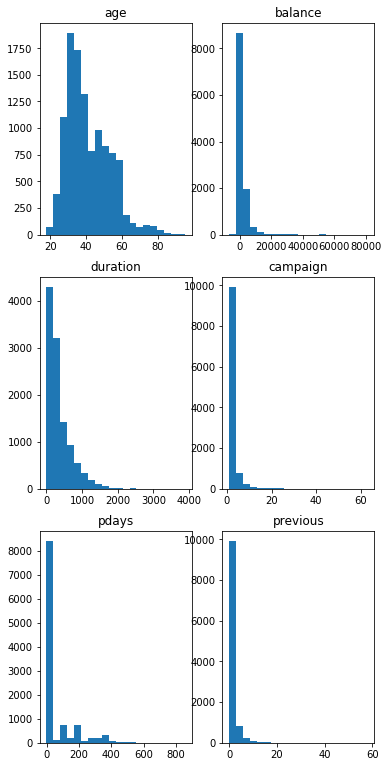

In [ ]:

# Display the data type and null values by using printschema function
df.printSchema()
# Display first 5 data obervations for all columns
pd.DataFrame(df.head(5), columns=df.columns).transpose()
# Display summary statistics for numeric variables
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' ]
df.select(numeric_features).describe().toPandas().transpose()
# Plotting histogram for numeric variables
fig = plt.figure()
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 2.5, top = 5, wspace = 0.2, hspace = 0.2)
# Plotting histogram for age 
plt.subplot(3, 2, 1)
bins, counts = df.select("age").rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title("age")
# Plotting histogram for balance
plt.subplot(3, 2, 2)
bins, counts = df.select("balance").rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title("balance")
# Plotting histogram for duration
plt.subplot(3, 2, 3)
bins, counts = df.select("duration").rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title("duration")
# Plotting histogram for campaign
plt.subplot(3, 2, 4)
bins, counts = df.select("campaign").rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title("campaign")
# Plotting histogram for pdays
plt.subplot(3, 2, 5)
bins, counts = df.select("pdays").rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title("pdays")
# Plotting histogram for previous
plt.subplot(3, 2, 6)
bins, counts = df.select("previous").rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title("previous")
# Display the graph
plt.show()





# 3.Select features

In [ ]:
# Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2
df2=df.select('age','job','marital','education','default','balance','housing','loan','campaign','pdays','previous','poutcome','deposit')
print(df2.show())



+---+-----------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|       1|   -1|       0| unknown|    yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|       1|   -1|       0| unknown|    yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|       1|   -1|       0| unknown|    yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  no|       2|   -1|       0| unknown|    yes|
| 42| management|  single| tertiary|     no|      0|    yes| yes|       2|   -1|       0| unknown|    yes|
| 56| management| married| tertiary| 

In [ ]:
#Remove invalid rows/records using spark.sql 
df2_new= df.filter((df['contact']!="unknown")).filter((df['poutcome'] != 'other')) \
.filter((df['poutcome'] != 'unknown')).filter((df['education'] != 'unknown')) \
.filter((df['job'] != 'unknown')).filter((df['marital'] != 'unknown')) \
.filter((df['default'] != 'unknown')) 
# Display the output
df2_new.show(20)
type(df2)


+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+
|age|         job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+
| 33|    services| married|secondary|     no|   3444|    yes|  no|telephone| 21|  oct|     144|       1|   91|       4| failure|    yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no| cellular| 17|  nov|    1091|       2|  150|       1| success|    yes|
| 37|  technician| married|secondary|     no|   5115|    yes|  no| cellular| 17|  nov|    1210|       2|  171|       4| failure|    yes|
| 45|entrepreneur| married|secondary|     no|    781|     no| yes| cellular| 17|  nov|     652|       2|  126|       2| failure|    yes|
| 46|  unemployed|divorced|secondary|    

pyspark.sql.dataframe.DataFrame

In [ ]:
#Covert categorical features to metric features using One hot encoding
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
categorical_columns= ['job', 'marital', 'education', 'default','housing', 'loan', 'poutcome']
index = [
    StringIndexer(inputCol=col, outputCol="{0}_i_val".format(col))
    for col in categorical_columns
]


# using oneHotEncoder function
encoders = [OneHotEncoder(dropLast=False,inputCol=i.getOutputCol(),
            outputCol="{0}_res".format(i.getOutputCol())) 
    for i in index
]

# Using VectorAssembler function
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders],outputCol="features")
a =  StringIndexer(inputCol = 'deposit', outputCol = 'deposit_i_val')
index = index + [a]

pipe = Pipeline(stages=index + encoders+[assembler])
model=pipe.fit(df2_new)
df2_new = model.transform(df2_new)

# Display output
df2_new.show()

+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+---------+-------------+---------------+-------------+-------------+----------+--------------+-------------+--------------+-----------------+-------------------+-----------------+-----------------+--------------+------------------+--------------------+
|age|         job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|job_i_val|marital_i_val|education_i_val|default_i_val|housing_i_val|loan_i_val|poutcome_i_val|deposit_i_val| job_i_val_res|marital_i_val_res|education_i_val_res|default_i_val_res|housing_i_val_res|loan_i_val_res|poutcome_i_val_res|            features|
+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+---------+-------------+---------------+-------------+-------------+----------+-------

## 3.1 normalisation

In [ ]:
# Removing selected attributes
dlist =  ['job', 'marital', 'education', 'default','housing', 'loan', 'poutcome', ]
df2_new.drop('job').drop('marital').drop('education').drop('default').drop('housing').drop('loan').drop('poutcome').drop('deposit').collect()
df2_new.createOrReplaceTempView('bank')
n = spark.sql("select age, balance, campaign, pdays,deposit_i_val,previous,job_i_val_res, marital_i_val_res, education_i_val_res, default_i_val_res, housing_i_val_res, loan_i_val_res, poutcome_i_val_res, features from bank")
df2_new.show()

+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+---------+-------------+---------------+-------------+-------------+----------+--------------+-------------+--------------+-----------------+-------------------+-----------------+-----------------+--------------+------------------+--------------------+
|age|         job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|job_i_val|marital_i_val|education_i_val|default_i_val|housing_i_val|loan_i_val|poutcome_i_val|deposit_i_val| job_i_val_res|marital_i_val_res|education_i_val_res|default_i_val_res|housing_i_val_res|loan_i_val_res|poutcome_i_val_res|            features|
+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+---------+-------------+---------------+-------------+-------------+----------+-------

In [ ]:
#Applying Min-Max normalisation on each attribute using MinMaxScaler
from pyspark.ml.feature import MinMaxScaler
assembler = VectorAssembler().setInputCols(n.columns).setOutputCol("features_new")
# Transforming the dataset
transformed = assembler.transform(n)
scaler = MinMaxScaler(inputCol="features_new",outputCol="scaledFeatures")
scalerModel =  scaler.fit(transformed.select("features_new"))
scaledData = scalerModel.transform(transformed)
scaledData.createOrReplaceTempView('a')
new = spark.sql("select  scaledFeatures as features from a")
scaledData.show()



+---+-------+--------+-----+-------------+--------+--------------+-----------------+-------------------+-----------------+-----------------+--------------+------------------+--------------------+--------------------+--------------------+
|age|balance|campaign|pdays|deposit_i_val|previous| job_i_val_res|marital_i_val_res|education_i_val_res|default_i_val_res|housing_i_val_res|loan_i_val_res|poutcome_i_val_res|            features|        features_new|      scaledFeatures|
+---+-------+--------+-----+-------------+--------+--------------+-----------------+-------------------+-----------------+-----------------+--------------+------------------+--------------------+--------------------+--------------------+
| 33|   3444|       1|   91|          0.0|       4|(11,[5],[1.0])|    (3,[0],[1.0])|      (3,[0],[1.0])|    (2,[0],[1.0])|    (2,[1],[1.0])| (2,[0],[1.0])|     (2,[0],[1.0])|(25,[5,11,14,17,2...|(56,[0,1,2,3,5,11...|[0.21428571428571...|
| 53|   2269|       2|  150|          0.0|      

# 4.Unsupervised learning

## 4.1 K-means

In [ ]:
# Perform unsupervised learning on df2 with k-means 
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
 
# Trains a k-means model
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(new)
trans = model.transform(new)
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(trans)

print("Silhouette with squared euclidean distance = " + str(silhouette))

centers = model.clusterCenters()

for center in centers:
    print(center)

trans.show()


Silhouette with squared euclidean distance = 0.2841566617792768
[0.36162698 0.03695501 0.06952862 0.18883136 0.12407407 0.0372085
 0.36111111 0.12407407 0.0962963  0.04814815 0.13425926 0.03796296
 0.06203704 0.05648148 0.04259259 0.01203704 0.025      0.53611111
 0.37777778 0.08611111 0.30555556 0.6        0.09444444 1.
 0.         0.89351852 0.10648148 0.95462963 0.04537037 0.21296296
 0.78703704 0.36111111 0.12407407 0.0962963  0.04814815 0.13425926
 0.03796296 0.06203704 0.05648148 0.04259259 0.01203704 0.025
 0.53611111 0.37777778 0.08611111 0.30555556 0.6        0.09444444
 1.         0.         0.89351852 0.10648148 0.95462963 0.04537037
 0.21296296 0.78703704]
[0.31996068 0.02846724 0.08048374 0.28095335 0.49357798 0.04040095
 0.14862385 0.2        0.18715596 0.2        0.04678899 0.10183486
 0.02477064 0.02385321 0.02568807 0.02752294 0.01376147 0.59633028
 0.30275229 0.10091743 0.69174312 0.19908257 0.10917431 0.99357798
 0.00642202 0.20825688 0.79174312 0.85229358 0.14770642

In [ ]:
# Predicting the output values
pred = trans.select("prediction").collect()
real = scaledData.select("deposit_i_val").collect()
from sklearn.metrics import confusion_matrix
logreg_matrix = confusion_matrix(real, pred)
logreg_matrix
# Evaluate clustering results with accuracy
accuracy  = logreg_matrix[0,0]+logreg_matrix[1,1]
accuracy = accuracy/(logreg_matrix[0,0]+logreg_matrix[1,1] + logreg_matrix[1,0]+logreg_matrix[0,1])
accuracy

0.6838709677419355

In [ ]:
# Finding the test error
print("Test error = %g" % (1.0 - accuracy))

Test error = 0.316129


## 4.2 PCA

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------+
|features                                                                                                                                                                                                                                                                                                           |pcaFeatures                               |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

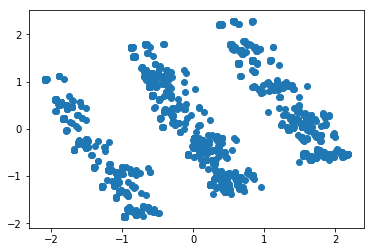

In [ ]:
#Generate a scatter plot using the first two PCA components to investigate the data distribution.
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
import matplotlib.pyplot as plt
import numpy as np
# two pca components
pca = PCA(k=2, inputCol="features",outputCol="pcaFeatures")
model = pca.fit(new)
# apply PCA
result = model.transform(new)
result.show(5, truncate=False)
print ("count of result", result.count())
#plot
X_pca = result.rdd.map(lambda row: row.pcaFeatures).collect()
X_pca = np.array(X_pca)
 
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()



# 5.Supervised learning

In [ ]:
# use 70 percent df2 as training data set and 30 percent as testing data set
train, test = df2.randomSplit([0.7, 0.3], seed = 742)
# Display count of training data set and test data set
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7822
Test Dataset Count: 3340


## 5.1 LogisticRegression

In [ ]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
split = scaledData.randomSplit([0.7,0.3])
# Fit Logistic Regression Model to train data set
reg = LogisticRegression(featuresCol = 'features', labelCol = 'deposit_i_val', maxIter=10)
res = reg.fit(split[0])

In [ ]:
#Exam the coefficients
res.coefficients

DenseVector([-0.0219, 0.0869, 0.0253, 0.1123, -0.247, 0.0973, -0.4564, -0.2826, 0.0279, 0.8082, 0.6768, 0.0272, 0.0071, -0.0583, 0.0596, -0.077, 0.0752, -0.1734, 1.2175, -0.442, 0.4559, -0.339, 0.3788, 1.1079, -1.094])

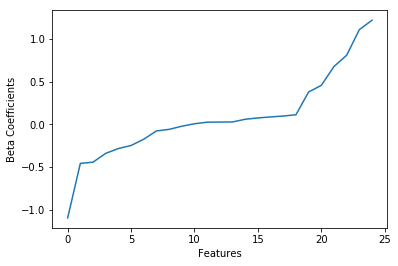

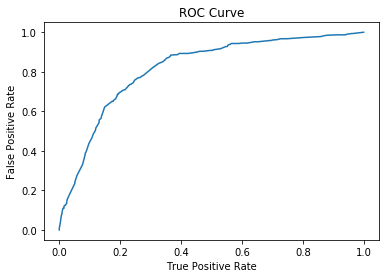

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
beta_coeff = np.sort(res.coefficients)
plt.plot(beta_coeff)
plt.ylabel('Beta Coefficients')
plt.xlabel('Features')
plt.show()
summary = res.summary
roc = summary.roc.toPandas()
plt.plot(roc['FPR'], roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
# predicting the output values 
predictions = res.transform(split[1])
predictions.select('age', 'deposit_i_val', 'rawPrediction', 'prediction', 'probability').show()
predictions.createOrReplaceTempView('pd')
pred_val = spark.sql("select age, deposit_i_val as label, rawPrediction,prediction,probability from pd")
# Display the predicted values 
pred_val.show() 

+---+-------------+--------------------+----------+--------------------+
|age|deposit_i_val|       rawPrediction|prediction|         probability|
+---+-------------+--------------------+----------+--------------------+
| 19|          0.0|[3.24814442647386...|       0.0|[0.96260637796184...|
| 21|          0.0|[-1.1582395032273...|       1.0|[0.23898732375588...|
| 21|          1.0|[2.69496598583973...|       0.0|[0.93672894397203...|
| 22|          0.0|[2.70990383493308...|       0.0|[0.93760852331761...|
| 22|          0.0|[2.69496598583973...|       0.0|[0.93672894397203...|
| 22|          0.0|[3.24814442647386...|       0.0|[0.96260637796184...|
| 23|          1.0|[-0.4048413735632...|       1.0|[0.40014970562357...|
| 23|          0.0|[2.70990383493308...|       0.0|[0.93760852331761...|
| 23|          0.0|[-0.1812319720086...|       1.0|[0.45481561288682...|
| 24|          0.0|[1.06175923926709...|       0.0|[0.74302659464908...|
| 24|          0.0|[3.26368758997751...|       0.0|

In [ ]:
# Using logarithemic regression function
a = res.summary.roc
b = res.summary.pr
# Predicting the output values
pred = predictions.select("prediction").collect()
real = predictions.select("deposit_i_val").collect()
logreg_matrix = confusion_matrix(real, pred)
logreg_matrix
acc_rate  = logreg_matrix[0,0]+logreg_matrix[1,1]
acc_rate = acc_rate/(logreg_matrix[0,0]+logreg_matrix[1,1] + logreg_matrix[1,0]+logreg_matrix[0,1])
# Display accuracy value
print("Accuracy :",acc_rate)
# Display ROC Value
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(pred_val))

Accuracy : 0.7492492492492493
Test Area Under ROC 0.7861599546228021


## 5.2 Decision tree

In [ ]:
# Using decision tree algorithm
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(maxDepth=2, labelCol="deposit_i_val")
res1 = dt.fit(split[0])
# Display the selected attributes 
predictions = res1.transform(split[1])
predictions.select('age', 'deposit_i_val', 'rawPrediction', 'prediction', 'probability').show()
predictions.createOrReplaceTempView('predict')
pred_val = spark.sql("select age, deposit_i_val as label, rawPrediction,prediction,probability from predict")
# Display the predicted values 
pred_val.show()
# Predicting the output values 
pred = predictions.select("prediction").collect()
real = predictions.select("deposit_i_val").collect()
logreg_matrix = confusion_matrix(real, pred)
logreg_matrix
# Display the accuracy value 
acc_val  = logreg_matrix[0,0]+logreg_matrix[1,1]
acc_val = acc_val/(logreg_matrix[0,0]+logreg_matrix[1,1] + logreg_matrix[1,0]+logreg_matrix[0,1])
# Display the accuracy value 
print("Accuracy :",acc_val)

+---+-------------+-------------+----------+--------------------+
|age|deposit_i_val|rawPrediction|prediction|         probability|
+---+-------------+-------------+----------+--------------------+
| 19|          0.0| [647.0,53.0]|       0.0|[0.92428571428571...|
| 21|          0.0|[190.0,297.0]|       1.0|[0.39014373716632...|
| 21|          1.0| [647.0,53.0]|       0.0|[0.92428571428571...|
| 22|          0.0| [647.0,53.0]|       0.0|[0.92428571428571...|
| 22|          0.0| [647.0,53.0]|       0.0|[0.92428571428571...|
| 22|          0.0| [647.0,53.0]|       0.0|[0.92428571428571...|
| 23|          1.0|[190.0,297.0]|       1.0|[0.39014373716632...|
| 23|          0.0| [647.0,53.0]|       0.0|[0.92428571428571...|
| 23|          0.0|[190.0,297.0]|       1.0|[0.39014373716632...|
| 24|          0.0|[210.0,107.0]|       0.0|[0.66246056782334...|
| 24|          0.0| [647.0,53.0]|       0.0|[0.92428571428571...|
| 24|          0.0| [647.0,53.0]|       0.0|[0.92428571428571...|
| 24|     

## 5.3 NaiveBayes

In [ ]:
#NaiveBayes
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1.0, labelCol = 'deposit_i_val', modelType="multinomial")
NB_model =  nb.fit(split[0])
# Using spark.sql to display attributes 
predictions = NB_model.transform(split[1])
predictions.select('age', 'deposit_i_val', 'rawPrediction', 'prediction', 'probability').show()
predictions.createOrReplaceTempView('predict1')
pred_val1 = spark.sql("select age, deposit_i_val as label, rawPrediction,prediction,probability from predict1")
pred_val1.show()
# Predicting the output values 
pred = predictions.select("prediction").collect()
real = predictions.select("deposit_i_val").collect()
logreg_matrix = confusion_matrix(real, pred)
logreg_matrix
# Predicting the accuracy value
acc1_rate  = logreg_matrix[0,0] + logreg_matrix[1,1]
acc1_rate = acc1_rate/(logreg_matrix[0,0] + logreg_matrix[1,1] + logreg_matrix[1,0] + logreg_matrix[0,1])
print("Accuracy :",acc1_rate)
# predicting ROC value
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(pred_val1))

+---+-------------+--------------------+----------+--------------------+
|age|deposit_i_val|       rawPrediction|prediction|         probability|
+---+-------------+--------------------+----------+--------------------+
| 19|          0.0|[-21.028955653831...|       0.0|[0.98954486687958...|
| 21|          0.0|[-23.950888982060...|       1.0|[0.07878602052159...|
| 21|          1.0|[-19.008540309748...|       0.0|[0.94195870303298...|
| 22|          0.0|[-19.495195572586...|       0.0|[0.94613779308052...|
| 22|          0.0|[-19.008540309748...|       0.0|[0.94195870303298...|
| 22|          0.0|[-21.028955653831...|       0.0|[0.98954486687958...|
| 23|          1.0|[-20.091414804126...|       1.0|[0.24711743860446...|
| 23|          0.0|[-19.495195572586...|       0.0|[0.94613779308052...|
| 23|          0.0|[-19.961175978305...|       1.0|[0.42741110341745...|
| 24|          0.0|[-19.960309755846...|       0.0|[0.88260762408134...|
| 24|          0.0|[-19.480380486801...|       0.0|